# Exercise 4.10, Part 1:

First part of the final task for Achievement 4.  Providing better insight for customer profiling in terms of ads, bonus programs, and sales information.

## Step 1:
Importing libraries & paths:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\steve\Documents\CF - Instacart Project'

In [4]:
#temp use
path = r'C:\Users\steve\OneDrive\Documents\Career Foundry\02 Data\Prepared Data'

In [ ]:
# Assigning opm as the main dataframe name/variable
opm = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','nearfinal.pkl'))

In [6]:
#temp use
opm = pd.read_pickle(os.path.join(path,'nearfinal.pkl'))

## Step 2:
Consider any security implications that might exist for this new data. You’ll need to address any Personally Identifiable Information (PII) data in the data before continuing your analysis.

In [8]:
# Removing the limit on max columns for the head function
pd.set_option('display.max_columns', None)

In [10]:
# This is how you reset the above
pd.reset_option('display.max_columns')

In [11]:
# Viewing some rows and all columns to determine if there are any privacy issues
opm.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


#### Insight:
There does not appear to be any PII located within the dataframe.  The original data had the first and last names included, but that was cut out from this final set.  I do not believe gender, along with age and state would be enough to directly identify any individual.  Due to that, this dataframe does not provide any PII and should be fine to work with.

## Step 3:
The Instacart officers are interested in comparing customer behavior in different geographic areas. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [6]:
# Creating a mapping dictionary for US regions
region_map = {
    'Maine':'Northeast',
    'New Hampshire':'Northeast',
    'Vermont':'Northeast',
    'Massachusetts':'Northeast',
    'Rhose Island':'Northeast',
    'Connecticut':'Northeast',
    'New York':'Northeast',
    'Pennsylvania':'Northeast',
    'New Jersey':'Northeast',
    'Wisconsin':'Midwest',
    'Michigan':'Midwest',
    'Illinois':'Midwest',
    'Indiana':'Midwest',
    'Ohio':'Midwest',
    'North Dakota':'Midwest',
    'South Dakota':'Midwest',
    'Nebraska':'Midwest',
    'Kansas':'Midwest',
    'Minnesota':'Midwest',
    'Iowa':'Midwest',
    'Missouri':'Midwest',
    'Delaware':'South',
    'Maryland':'South',
    'District of Columbia':'South',
    'Virginia':'South',
    'West Virginia':'South',
    'North Carolina':'South',
    'South Carolina':'South',
    'Georgia':'South',
    'Florida':'South',
    'Kentucky':'South',
    'Tennessee':'South',
    'Mississippi':'South',
    'Alabama':'South',
    'Oklahoma':'South',
    'Texas':'South',
    'Arkansas':'South',
    'Louisiana':'South',
    'Idaho':'West',
    'Montana':'West',
    'Wyoming':'West',
    'Nevada':'West',
    'Utah':'West',
    'Colorado':'West',
    'Arizona':'West',
    'New Mexico':'West',
    'Alaska':'West',
    'Washington':'West',
    'Oregon':'West',
    'California':'West',
    'Hawaii':'West'
}

In [7]:
# Creating region category and assigning its value based on state for that row
opm['region'] = opm['state'].map(region_map)

In [8]:
# Performing a count to verify that the category is there and that regions are assigned
opm['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5065823
Name: count, dtype: int64

In [9]:
# Creating a crosstab to compare regions with spending_flag
cross_opm = pd.crosstab(opm['region'],opm['spending_flag'], dropna=False)

In [10]:
# Copying to clip board to past into Excel
cross_opm.to_clipboard()

In [ ]:
# Output from Excel - this actually is formatted rather well within for Python too
# DO NOT RUN THIS
region	High spender	Low spender
Midwest	156154	7441171
Northeast	93435	4972388
South	210017	10581868
West	160478	8132435

#### Insight:


There does not appear to be a difference in spending habits between the four regions of the US.  By calculating the percentage of the high and low spending population, the results were very close.


The high spender population for all four regions ranged between 2.0-1.8% while the low spender population for all four regions ranged between 97.9-98.1%. 

## Step 4:


The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [11]:
# Getting a count of the main dataframe, since the export will be cutting this number
opm.shape

(32404859, 29)

In [12]:
# Grouping by user id to associate order numbers to them
opm.groupby('user_id')

In [13]:
# Creating new cust_activity column and flagging low activity users
opm.loc[opm['max_order']<5, 'cust_activity'] = 'Low activity'

In [14]:
# Doing the same for high activity users
opm.loc[opm['max_order']>=5, 'cust_activity'] = 'High activity'

In [15]:
# Getting the counts of High and Low activity labels
opm['cust_activity'].value_counts()

cust_activity
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

#### Insight:
So the above is good, but the issue is that each row is basically a purchase by that user.  i.e. there isn't 30 million "high activity" users, there are 30 million rows labelled with "high activity".  Just to be safe, I want to make sure the users are labelled correctly.  To do this, I will create a subset where the user_id is grouped with their order number and a count of items in that order can be retrieved.

In [16]:
# Creating subset of data and grouping by user_id, order_number, and cust_activity
activity_counts = opm.groupby(['user_id', 'order_number', 'cust_activity'])['cust_activity'].count()

In [17]:
# Resetting index and making the subset a dataframe
activity_counts = activity_counts.reset_index(name='count')

In [18]:
# Quick numbers verification
print(activity_counts)

         user_id  order_number  cust_activity  count
0              1             1  High activity      5
1              1             2  High activity      6
2              1             3  High activity      5
3              1             4  High activity      5
4              1             5  High activity      8
...          ...           ...            ...    ...
3214680   206209             9  High activity      3
3214681   206209            10  High activity      9
3214682   206209            11  High activity      8
3214683   206209            12  High activity     20
3214684   206209            13  High activity      9

[3214685 rows x 4 columns]


In [19]:
# This worked out well, enter a user ID to see their total orders and how many items were in that order
activity_counts[activity_counts['user_id'] ==5]

,user_id,order_number,cust_activity,count
41,5,1,Low activity,11
42,5,2,Low activity,9
43,5,3,Low activity,5
44,5,4,Low activity,12


In [19]:
# Creating a new subset with the low activity rows dropped
high_act_opm = opm.loc[opm['cust_activity'] == 'High activity']

In [20]:
high_act_opm.head(3)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,region,cust_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity


In [22]:
# Verifying only High activity users made it, and number matches opm's value_counts
high_act_opm['cust_activity'].value_counts()

cust_activity
High activity    30964564
Name: count, dtype: int64

In [24]:
# Exporting this for CFO, using .csv file instead of pickle for exec
high_act_opm.to_csv(os.path.join(path, '05 Sent to Client', 'high_account_activity.csv'))
high_act_opm.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_account_activity.pkl'))

## Step 5:


The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### Creating a label using age:

In [21]:
# For age, separating them into categories may be useful, first to get some data
age_opm = opm['age'].describe()

In [22]:
print(age_opm)

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64


#### Insight:


Looks like we have a minimum age of 18, and a max of 81.  Additionally, the average is around 49 years of age.  Outliers look to be above 65 years and below 33 years.


We might be able to go with a starting age bracket of 18-34, so we can keep a clean start age of X5 for each bracket.  Ending at 65+ years, so that both the lower and higher outliers are within a single grouping each.

In [23]:
# Creating age_group column in opm dataframe, assigning 
opm.loc[opm['age'] <= 34, 'age_group'] = '18-34ys'

In [24]:
opm.loc[(opm['age'] >= 35) & (opm['age']<= 44), 'age_group'] = '35-44yrs'

In [25]:
opm.loc[(opm['age'] >= 45) & (opm['age']<=54), 'age_group'] = '45-54yrs'

In [26]:
opm.loc[(opm['age']>=55) & (opm['age']<=64), 'age_group'] = '55-64yrs'

In [27]:
opm.loc[opm['age']>=65, 'age_group'] = '65yrs and above'

In [28]:
# Checking the counts, it may be possible to divide 18-34 further, in the future - as the population is relatively large
opm['age_group'].value_counts()

age_group
18-34ys            8627655
65yrs and above    8575084
45-54yrs           5111126
35-44yrs           5062429
55-64yrs           5028565
Name: count, dtype: int64

### Creating a label using income:

In [29]:
income_opm = opm['income'].describe()

In [30]:
print(income_opm)

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64


#### Insight:


The average for income is around 99,437. The min is about 25,903 and the max is about 593,901. The numbers seem a bit inflated but it does not account for possible dual income reporting? I believe we can use the lower quartile to mark the "Low income" users and the upper quartile for the "High income" users.  The "Regular income" users can be everything in between:


Low income = 67,004 and lower


Regular income = 67,005 - 127,911


High income = 127,912 and higher

In [31]:
# Defining income categories
low_income_threshold = 67004
high_income_threshold = 127912

In [32]:
# Setting the threshold of each income tier using if then logic
def categorize_income(income):
    if income<=low_income_threshold:
        return 'Low income'
    elif low_income_threshold < income <= high_income_threshold:
        return 'Regular income'
    else:
        return "High income"

In [33]:
opm['income_status'] = opm['income'].apply(categorize_income)

In [34]:
opm.head(3)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,region,cust_activity,age_group,income_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income


In [74]:
# Grabbing a count of the values, makes sense cause low and high take up 25% of the dataset and regular is 50%
opm['income_status'].value_counts()

income_status
Regular income    16202177
Low income         8101644
High income        8101038
Name: count, dtype: int64

### Creating label based on department_id:

In [75]:
# Looking at the departments_wrangled.csv file, I noticed depart 21 is missing
# Going to try to find what it could be
opm.loc[opm['department_id']==21]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,age_group,income_status
983,2770903,43,11,0,12,9.0,22117,10,0,Unsweetened Original Almond Milk,100,21,4.1,Low-range product,Busiest day,Most orders,11,Regular customer,7.44,Low spender,10.0,Frequent customer,Female,Tennessee,41,1,married,123723,35-44yrs,Regular income
3492,1391104,290,20,6,10,7.0,13700,24,0,Fresh Whole Mushrooms,100,21,14.6,Mid-range product,Regularly busy,Most orders,51,Loyal customer,7.29,Low spender,7.0,Frequent customer,Female,Michigan,24,1,married,55550,18-34ys,Low income
3561,2706088,290,28,6,10,7.0,34014,9,0,Black Ink 1.4 mm Ball Point Pens,100,21,5.4,Mid-range product,Regularly busy,Most orders,51,Loyal customer,7.29,Low spender,7.0,Frequent customer,Female,Michigan,24,1,married,55550,18-34ys,Low income
3562,430480,290,48,6,11,7.0,34014,17,1,Black Ink 1.4 mm Ball Point Pens,100,21,5.4,Mid-range product,Regularly busy,Most orders,51,Loyal customer,7.29,Low spender,7.0,Frequent customer,Female,Michigan,24,1,married,55550,18-34ys,Low income
3602,767375,290,31,0,10,9.0,40347,45,0,"Cushioned Mailer, #2, Manila",100,21,5.4,Mid-range product,Busiest day,Most orders,51,Loyal customer,7.29,Low spender,7.0,Frequent customer,Female,Michigan,24,1,married,55550,18-34ys,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32402995,1556835,128522,3,5,17,30.0,10043,2,0,Lightly Sweet Chai Skinny Latte,100,21,2.8,Low-range product,Regularly busy,Average orders,4,New customer,5.02,Low spender,30.0,Non-frequent customer,Female,Alaska,56,2,married,46467,55-64yrs,Low income
32403424,305621,132005,4,3,21,30.0,28150,1,0,Ultra Moisture Shea Butter Body Wash,100,21,1.1,Low-range product,Least busy,Average orders,4,New customer,7.57,Low spender,30.0,Non-frequent customer,Female,Kansas,52,2,married,95809,45-54yrs,Regular income
32403636,2434355,140031,2,3,9,5.0,39739,5,0,Organic Nondairy Strawberry Cashew Yogurt,100,21,4.7,Low-range product,Least busy,Most orders,6,New customer,6.15,Low spender,5.0,Frequent customer,Male,Minnesota,25,0,single,31053,18-34ys,Low income
32403637,2434355,140031,2,3,9,5.0,11224,4,0,Organic Cashew Nondairy Blueberry Yogurt,100,21,14.8,Mid-range product,Least busy,Most orders,6,New customer,6.15,Low spender,5.0,Frequent customer,Male,Minnesota,25,0,single,31053,18-34ys,Low income


#### Insight:
Not really sure what the department is.  There's office supplies, dairy, fresh vegetables, health and beauty items, etc.  Prices range anywhere from 1.10 to 14.80.  The only thing consistent is that all the products are in isle 100.  However, prices do not indicate clearance or sale items nor is there a seasonal theme to the products.  Due to this, I am going to simply label the department as Misc in the csv file.

In [35]:
# Loading departments csv file
deptdf = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [36]:
# Checking to make sure its loaded
deptdf

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
# Renaming Unnamed: 0 to department_id
deptdf = deptdf.rename(columns = {'Unnamed: 0':'department_id'})

In [38]:
# Creating a new dataframe for merged content
opm_merged = opm.merge(deptdf, on = 'department_id')

In [39]:
# Checking that everything looks alright
opm_merged.head(3)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,region,cust_activity,age_group,income_status,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income,beverages


In [86]:
opm_merged['department'].value_counts()

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
misc                 69145
other                36291
bulk                 34573
Name: count, dtype: int64

### Creating label based on number of dependants:

In [40]:
# Checking to see how many dependants the dataset is working with
opm_merged['num_dependants'].value_counts()

num_dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

#### Insight:
Looking at this, the first thing that comes to mind is that there is a sharp change in life style from having no children, to having even one.  Due to this, I think "No children" is a clear categorization, but the question is how to define anywhere from 1-3 children.


First time parents can have very different day to day experiences compared to those with 2 or 3 children, due to that initial learning curve of parenting.  Due to this, I suspect that spending and shopping habits for parents with 2 to 3 children are much more similar than those with only 1.  As such, I think we will go with "Small family" for 1 children households and "Large family" for households with 2 - 3 children.

In [41]:
# Locating entry for num_dependants and assigning a value based on that to the new column family_size
opm_merged.loc[opm_merged['num_dependants'] < 1, 'family_size'] = 'No children'

In [42]:
opm_merged.loc[(opm_merged['num_dependants']>0) & (opm_merged['num_dependants']<2), 'family_size'] = 'Small family'

In [43]:
opm_merged.loc[opm_merged['num_dependants']>=2, 'family_size'] = 'Large family'

In [44]:
# Checking to make sure everything is still there and numbers match
opm_merged.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,region,cust_activity,age_group,income_status,department,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income,beverages,Large family


In [92]:
opm_merged['family_size'].value_counts()

family_size
Large family    16226252
No children      8097503
Small family     8081104
Name: count, dtype: int64

In [46]:
opm_merged.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'finaldataset.pkl'))

## Step 6:
Create an appropriate visualization to show the distribution of profiles.

### Visualization for age_group label:

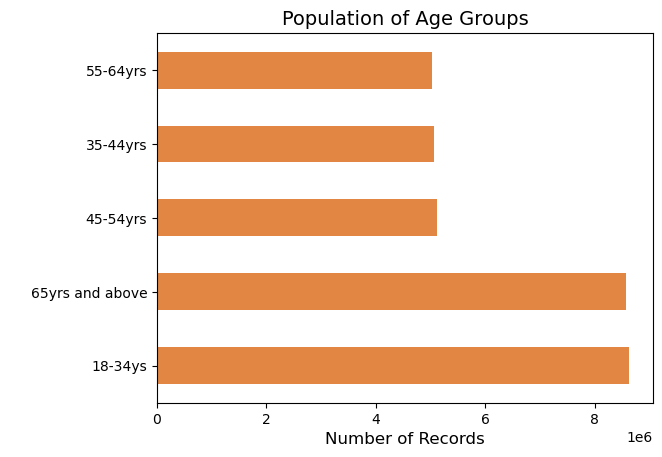

In [47]:
# Bar graph for age groups - using horizontal bar graph for ease of reading, removed y axis label due to redundancy
bar_age_group = opm_merged['age_group'].value_counts()
bar_age_group = bar_age_group.plot(kind='barh', color='#e28743')
plt.xlabel("Number of Records", fontsize=12)
plt.ylabel(" ", fontsize=12)  
plt.title("Population of Age Groups", fontsize=14)
plt.show()

### Visualization for income_status label:

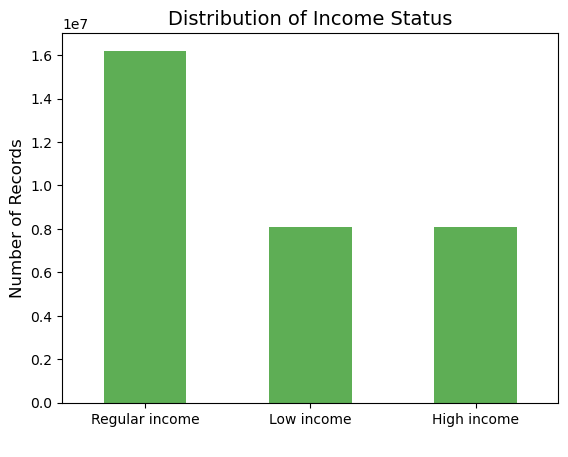

In [48]:
# Bar graph for income status - removed x axis label due to redundancy
bar_income_stat = opm_merged['income_status'].value_counts()
bar_income_stat = bar_income_stat.plot(kind='bar', color='#5eae55')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Distribution of Income Status", fontsize=14)
plt.show()

### Visualization for departments:

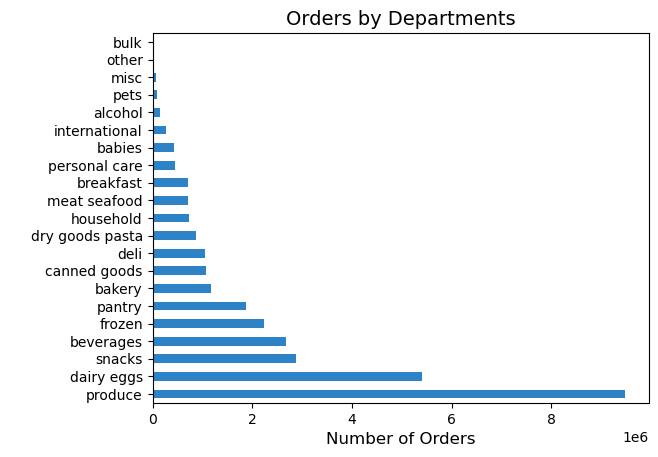

In [49]:
# bar chart listing out depts and their number of orders
bar_dept = opm_merged['department'].value_counts()
bar_dept = bar_dept.plot(kind='barh', color='#2d83c5')
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel(" ", fontsize=12)  
plt.title("Orders by Departments", fontsize=14)
plt.show()

### Visualization for family_size:

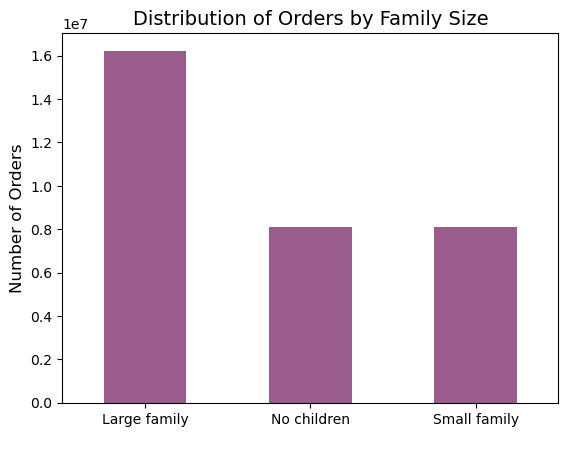

In [50]:
# Bar graph for family_size removed x axis label due to redundancy
bar_family_size = opm_merged['family_size'].value_counts()
bar_family_size = bar_family_size.plot(kind='bar', color='#9a5c8c')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders", fontsize=12)  
plt.title("Distribution of Orders by Family Size", fontsize=14)
plt.show()

### Looking for possible line chart ideas:

In [51]:
# Creating a sample population, to test a few line graphs
np.random.seed(26)
pool = np.random.rand(len(opm_merged))<=0.7

In [52]:
# Dividing the content into big and small pools
big = opm_merged[pool]
small = opm_merged[~pool]

In [53]:
# Quick checks to make sure everything is good
len(opm_merged)

32404859

In [54]:
len(small)

9720668

In [55]:
len(small)/len(opm_merged)

0.29997563019792806

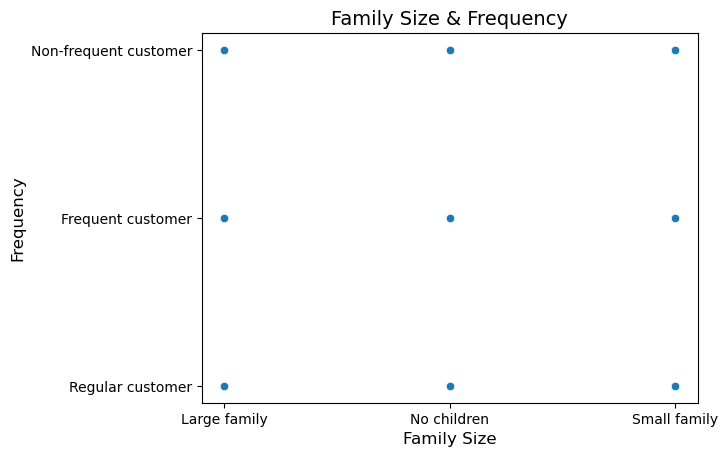

In [105]:
# Attempt at finding correlation between family size and how often they use the app
line_family_freq = sns.scatterplot(data = small, x = 'family_size', y = 'frequency_flag')
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)  
plt.title("Family Size & Frequency", fontsize=14)
plt.show()

This is clearly a failed experiment, it makes sense cause there is an existing record for each of these criterias.  Unusable visualization but I wanted to show the work done for this in case there are pointers or advice you can provide me with.

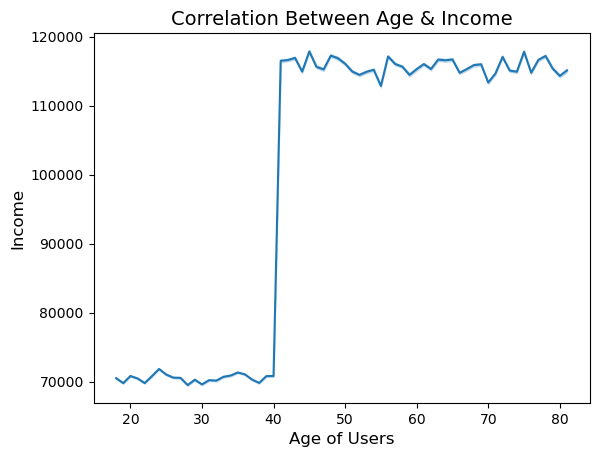

In [106]:
# Attempt to find a correlation between age and income
line_age_income = sns.lineplot(data = small, x = 'age', y = 'income')
plt.xlabel("Age of Users", fontsize=12)
plt.ylabel("Income", fontsize=12)  
plt.title("Correlation Between Age & Income", fontsize=14)
plt.show()

This one shows a big jump for the level of income, once the users on the app hit the age of 40.  This could be a potential market for advertising deals, due to them having expendable income and possibly being more inclined to use that with time limited purchases or discounts.

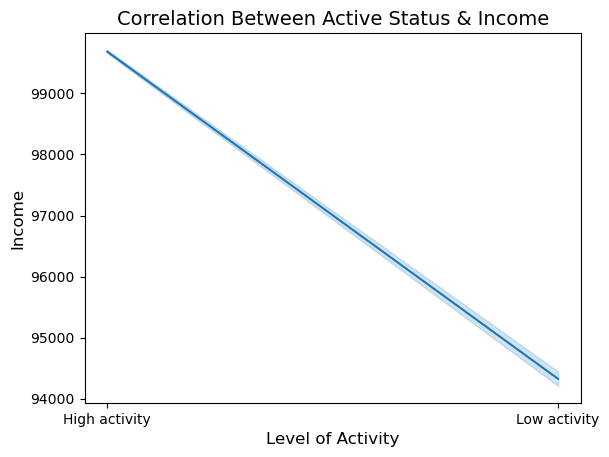

In [209]:
# Attempt at seeing if there is a correlation between how active a user is based on their income
line_actstatus_income = sns.lineplot(data = small, x = 'cust_activity', y = 'income')
plt.xlabel("Level of Activity", fontsize=12)
plt.ylabel("Income", fontsize=12)  
plt.title("Correlation Between Active Status & Income", fontsize=14)
plt.show()

It does appear that there is a correlation between income and activity on the app.  In this case, the more income a user has, they more they will use the app.  The opposite is true as well, the lower a user's income, the less likely they are to use the app.

## Step 7:
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [56]:
# Needed a reference of the main data frame
opm_merged.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,region,cust_activity,age_group,income_status,department,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income,beverages,Large family


In [108]:
# Comparing aggregates by age_group
opm_merged.groupby('age_group').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price               
                        mean min max          mean  min       max
age_group                                                        
18-34ys            17.121265   1  99     12.174002  1.0  12506.92
35-44yrs           17.194347   1  99     11.556616  1.0  25005.42
45-54yrs           17.174680   1  99     12.063266  1.0  15006.94
55-64yrs           17.168240   1  99     12.350246  1.1   8703.40
65yrs and above    17.098243   1  99     11.768870  1.0  14042.51

In [109]:
# Comparing aggregates by spending_flag
opm_merged.groupby('spending_flag').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price                
                      mean min max          mean   min       max
spending_flag                                                   
High spender     17.928141   1  99    222.126624  10.0  25005.42
Low spender      17.126600   1  99      7.780642   1.0      9.99

In [110]:
# Comparing aggregates by gender
opm_merged.groupby('gender').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price               
               mean min max          mean  min       max
gender                                                  
Female    17.213503   1  99     11.892079  1.0  25005.42
Male      17.072089   1  99     12.067159  1.0  15006.94

In [111]:
# Comparing aggregates by loyalty_flag
opm_merged.groupby('loyalty_flag').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price                
                         mean min max          mean   min       max
loyalty_flag                                                       
Loyal customer      32.641196   1  99     10.386315  2.39   8794.88
New customer         3.807044   1  10     13.294677  1.00  25005.42
Regular customer    12.347452   1  40     12.495730  1.31   4506.27

In [130]:
# Comparing aggregates by marital_status
opm_merged.groupby('marital_status').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price       \
                                         mean min max          mean  min   
marital_status                                                             
divorced/widowed                    17.275873   1  99     11.453702  1.2   
living with parents and siblings    17.296372   1  99     10.828763  1.3   
married                             17.088283   1  99     12.005663  1.0   
single                              17.258766   1  99     12.480828  1.0   

                                            
                                       max  
marital_status                              
divorced/widowed                  14042.51  
living with parents and siblings  10209.99  
married                           12506.92  
single                            25005.42

In [131]:
# Comparing aggregates by family_size
opm_merged.groupby('family_size').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price               
                     mean min max          mean  min       max
family_size                                                   
Large family    17.103375   1  99     12.080626  1.0  11772.10
No children     17.264622   1  99     12.129238  1.0  25005.42
Small family    17.097906   1  99     11.629320  1.1  12506.92

In [132]:
# Comparing aggregates by income_status
opm_merged.groupby('income_status').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price               
                       mean min max          mean  min       max
income_status                                                   
High income       17.300576   1  99     22.044305  7.0  25005.42
Low income        16.644854   1  99      7.291575  1.0     21.27
Regular income    17.311912   1  99      9.292706  7.0  12506.92

In [133]:
# Comparing aggregates by region
opm_merged.groupby('region').agg({'order_number':['mean', 'min', 'max'], 'average_price':['mean', 'min', 'max']})

order_number         average_price               
                  mean min max          mean  min       max
region                                                     
Midwest      16.925132   1  99     12.715508  1.0  25005.42
Northeast    17.194944   1  99     11.292723  1.1   5271.14
South        17.150968   1  99     12.195557  1.0  15006.94
West         17.279318   1  99     11.319857  1.0  10209.99

#### Insight:
I was really having fun throwing different flags into this part.  Unfortunately a lot of the outcomes were very similar.  Its possible it was just part of the data set.  However, i do wonder if I was able to group all user_id's accordingly and then take that result and group by order_id, would the prices then be of a higher average, due to it being an average of all the items in a particular order? I am not sure if I got that accurately calculated for the average_price column.  Using the price column would only get us an average count of each specific item, which is prob not ideal.

## Step 8:
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [114]:
# Getting reference of columns and values again
opm_merged.head(3)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,age_group,income_status,department,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,18-34ys,Low income,beverages,Large family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,18-34ys,Low income,beverages,Large family
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,18-34ys,Low income,beverages,Large family


### Comparing Income Status and Region:

In [57]:
# Creating a crosstab of income to region
# Had to reverse it, region to income, otherwise it just listed every possible income and showed ever possible instance of a matching record
# Third try's a charm, using income_status not actual income amount
crosstab_income_region = pd.crosstab(opm_merged['region'], opm_merged['income_status'], dropna=False)

In [58]:
crosstab_income_region

income_status,High income,Low income,Regular income
region,,,
Midwest,1928043,1876433,3792849
Northeast,1277376,1269189,2519258
South,2666255,2716231,5409399
West,2065884,2079521,4147508


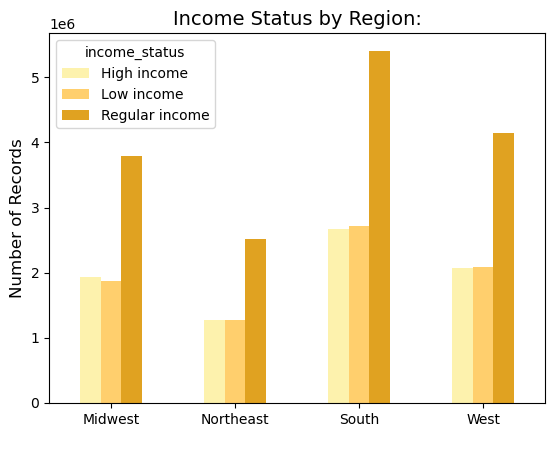

In [59]:
# Creating visualization for the crosstab
crossbar_income_region = crosstab_income_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Income Status by Region:", fontsize=14)
plt.show()

### Comparing Income & Departments:

In [60]:
# Now doing the same but for departments
crosstab_income_dept = pd.crosstab(opm_merged['department'], opm_merged['income_status'], dropna=False)

In [61]:
crosstab_income_dept

income_status,High income,Low income,Regular income
department,,,
alcohol,42993,39749,70954
babies,109102,86454,228246
bakery,303285,277207,591936
beverages,646054,776586,1265483
breakfast,170643,196565,335825
bulk,7803,9688,17082
canned goods,280071,235704,552283
dairy eggs,1371098,1280403,2747246
deli,262958,259807,528484


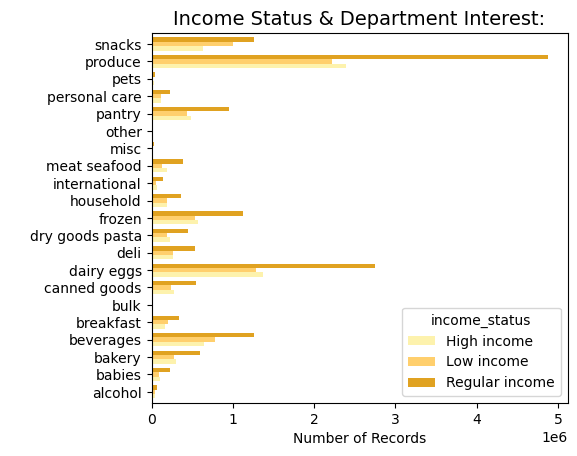

In [63]:
# Creating visualization for the crosstab
bar_width = .75
crossbar_income_dept = crosstab_income_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)  
plt.title("Income Status & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

### Comparing Family Size to Region:

In [65]:
# Creating crosstab for comparison chart
crosstab_family_region = pd.crosstab(opm_merged['region'], opm_merged['family_size'], dropna=False)

In [66]:
crosstab_family_region

family_size,Large family,No children,Small family
region,,,
Midwest,3765653,1905200,1926472
Northeast,2540253,1237838,1287732
South,5430496,2701659,2659730
West,4167921,2072343,2052649


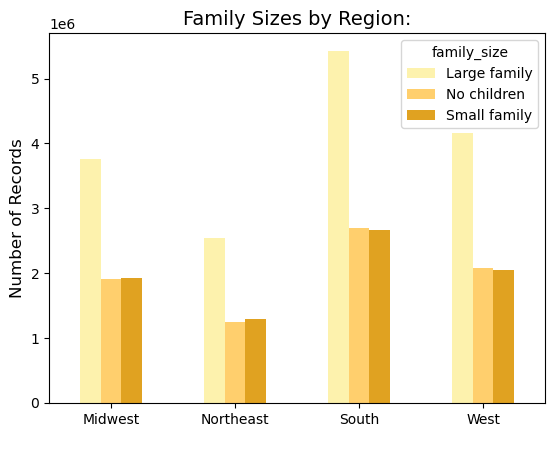

In [67]:
# Creating visualization for the crosstab
crossbar_family_region = crosstab_family_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Family Sizes by Region:", fontsize=14)
plt.show()

### Comparing Family Size to Departments:

In [68]:
# Now doing the same but for departments
crosstab_family_dept = pd.crosstab(opm_merged['department'], opm_merged['family_size'], dropna=False)

In [69]:
crosstab_family_dept

family_size,Large family,No children,Small family
department,,,
alcohol,76614,39118,37964
babies,214069,106494,103239
bakery,585030,294405,292993
beverages,1345455,674442,668226
breakfast,351247,174577,177209
bulk,17447,8278,8848
canned goods,536091,264838,267129
dairy eggs,2695896,1349362,1353489
deli,526537,265145,259567


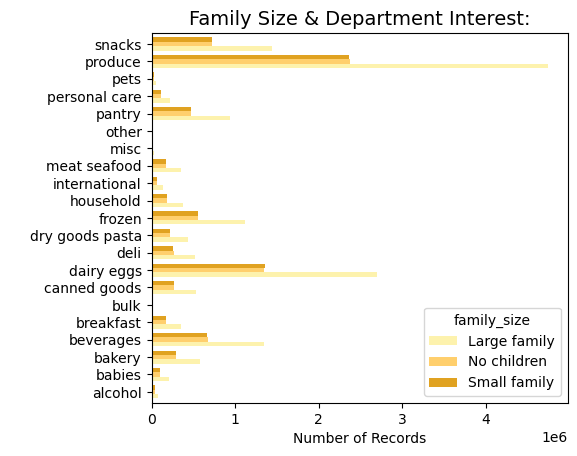

In [94]:
# Creating visualization for the crosstab
bar_width = .75
crossbar_family_dept = crosstab_family_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)  
plt.title("Family Size & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

### Comparing Spender Status to Region:

In [72]:
# Keeping the naming convention format is helping with this
crosstab_spending_region = pd.crosstab(opm_merged['region'], opm_merged['spending_flag'], dropna=False)

In [73]:
crosstab_spending_region

spending_flag,High spender,Low spender
region,,
Midwest,156154,7441171
Northeast,93435,4972388
South,210017,10581868
West,160478,8132435


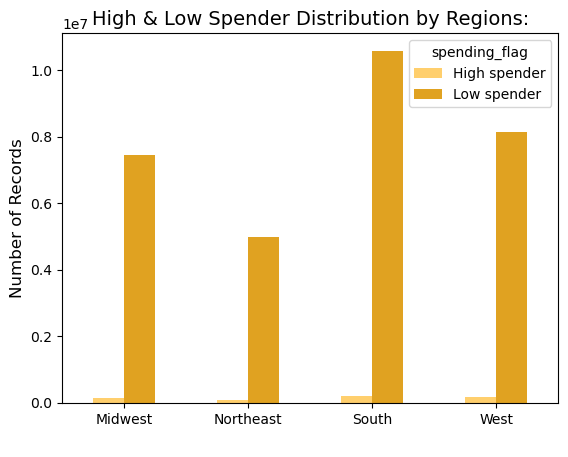

In [74]:
crossbar_spending_region = crosstab_spending_region.plot.bar(color=['#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("High & Low Spender Distribution by Regions:", fontsize=14)
plt.show()

### Comparing Spender Status to Department:

In [75]:
# Now doing the same but for departments
crosstab_spending_dept = pd.crosstab(opm_merged['department'], opm_merged['spending_flag'], dropna=False)

In [76]:
crosstab_spending_dept

spending_flag,High spender,Low spender
department,,
alcohol,13247,140449
babies,4693,419109
bakery,29561,1142867
beverages,61290,2626833
breakfast,15707,687326
bulk,128,34445
canned goods,21460,1046598
dairy eggs,114353,5284394
deli,17668,1033581


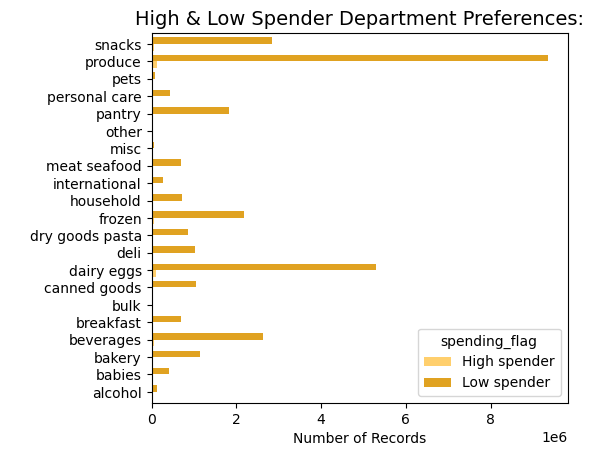

In [77]:
# Creating visualization for the crosstab
bar_width = .75
crossbar_spending_dept = crosstab_spending_dept.plot.barh(color=['#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)
plt.title("High & Low Spender Department Preferences:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

### Comparing Loyalty Level to Regions:

In [79]:
crosstab_loyalty_region = pd.crosstab(opm_merged['region'], opm_merged['loyalty_flag'], dropna=False)

In [80]:
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1626078,980975,2458770
South,3405844,2074410,5311631
West,2662690,1596800,4033423


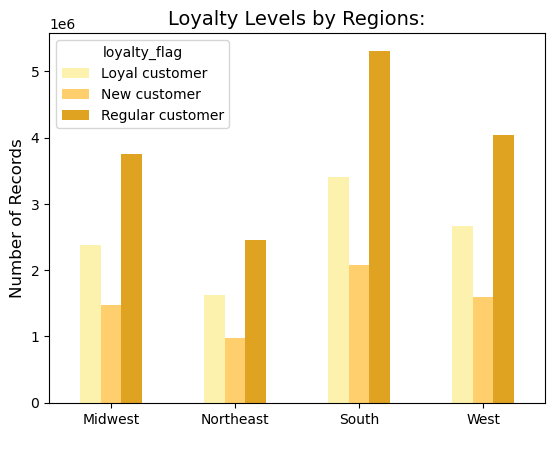

In [81]:
crossbar_loyalty_region = crosstab_loyalty_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Loyalty Levels by Regions:", fontsize=14)
plt.show()

### Comparing Loyalty Levels to Departments:

In [82]:
crosstab_loyalty_dept = pd.crosstab(opm_merged['department'], opm_merged['loyalty_flag'], dropna=False)

In [83]:
crosstab_loyalty_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


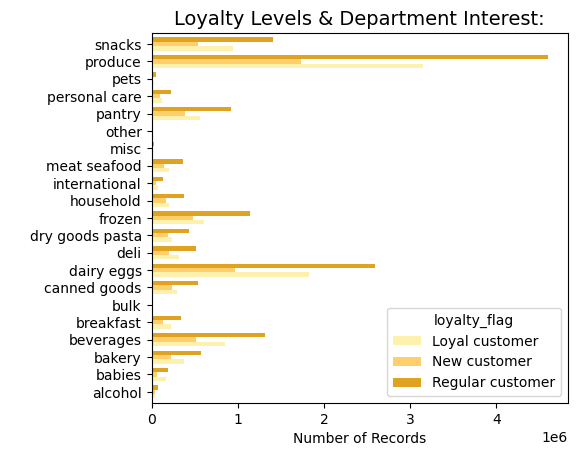

In [84]:
bar_width = .75
crossbar_loyalty_dept = crosstab_loyalty_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)
plt.title("Loyalty Levels & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

### Comparing Age Groups to Regions:

In [86]:
crosstab_agegroup_region = pd.crosstab(opm_merged['region'], opm_merged['age_group'], dropna=False)

In [87]:
crosstab_agegroup_region

age_group,18-34ys,35-44yrs,45-54yrs,55-64yrs,65yrs and above
region,,,,,
Midwest,2002572,1211728,1211169,1181012,1990844
Northeast,1355952,755473,812434,768508,1373456
South,2898325,1715211,1659311,1682781,2836257
West,2191216,1281064,1327529,1299024,2194080


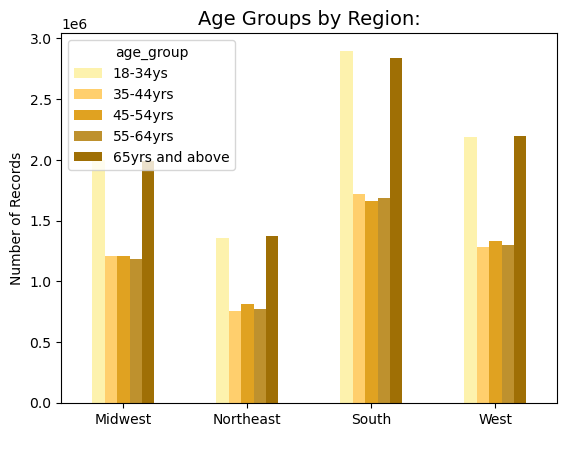

In [88]:
crossbar_agegroup_region = crosstab_agegroup_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221', '#BE912E', '#9F6F05'])
plt.xlabel(" ", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=10)
plt.title("Age Groups by Region:", fontsize=14)
plt.show()

### Comparing Age Groups to Departments:

In [90]:
crosstab_agegroup_dept = pd.crosstab(opm_merged['department'], opm_merged['age_group'], dropna=False)

In [91]:
crosstab_agegroup_dept

age_group,18-34ys,35-44yrs,45-54yrs,55-64yrs,65yrs and above
department,,,,,
alcohol,42621,22680,25326,24033,39036
babies,111092,69157,69655,64453,109445
bakery,312752,183462,184674,182018,309522
beverages,708101,414230,428696,422264,714832
breakfast,189037,108954,111828,109370,183844
bulk,9302,5391,5416,5222,9242
canned goods,285891,166695,168174,164860,282438
dairy eggs,1445304,845477,849262,832491,1426213
deli,279021,165396,164303,164911,277618


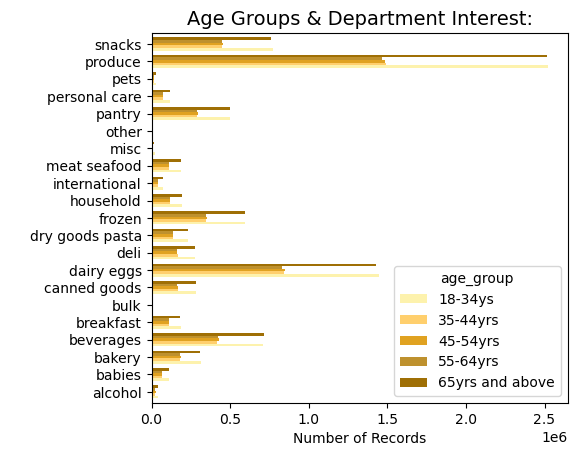

In [92]:
# Prior to running this, I want to note its probably a bad idea, since there are 5 bars for each department...
bar_width = .75
crossbar_agegroup_dept = crosstab_agegroup_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221', '#BE912E', '#9F6F05'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)  
plt.title("Age Groups & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()